# ✈️ Project 01: 공중 비행 물체 분류
---

## 주제: 공중 비행 물체 분류 (사전 훈련 모델 + 분류기)
---

### 목표 (Target)
- **드론**
- **제트기**
- **헬리콥터** 
- **미사일** 
- **여행기** 
- **로켓**


### 목차
1. 이미지 불러오기.
2. 데이터 프레임으로 file 경로 및 target 분류.
3. 데이터 훈련.
4. 데이터 검증.
5. 결론.

## 1. 이미지 불러오기

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/p_planes/'

IMAGE_SIZE = 128
BATCH_SIZE = 64

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode='categorical')
print(generator.class_indices)

Found 8414 images belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'drone',
 1: 'fighter-jet',
 2: 'helicopter',
 3: 'missile',
 4: 'passenger-plane',
 5: 'rocket'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

f_df = pd.DataFrame({'file_paths': generator.filepaths,'target_names': target_names, 'targets': generator.classes})
f_df

file_paths target_names  targets
0      ./datasets/p_planes/drone/00000000.jpg        drone        0
1      ./datasets/p_planes/drone/00000001.jpg        drone        0
2      ./datasets/p_planes/drone/00000002.jpg        drone        0
3      ./datasets/p_planes/drone/00000003.jpg        drone        0
4      ./datasets/p_planes/drone/00000004.jpg        drone        0
...                                       ...          ...      ...
8409  ./datasets/p_planes/rocket/00001238.JPG       rocket        5
8410  ./datasets/p_planes/rocket/00001239.jpg       rocket        5
8411  ./datasets/p_planes/rocket/00001240.jpg       rocket        5
8412  ./datasets/p_planes/rocket/00001241.JPG       rocket        5
8413  ./datasets/p_planes/rocket/00001242.jpg       rocket        5

[8414 rows x 3 columns]

In [6]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(f_df.file_paths, 
                 f_df.targets, 
                 stratify=f_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
1    1474
4    1130
2    1087
3    1052
0    1050
5     938
Name: count, dtype: int64
targets
1    369
4    282
2    272
3    263
0    262
5    235
Name: count, dtype: int64


In [7]:
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify = train_targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    1179
4     904
2     869
3     842
0     840
5     750
Name: count, dtype: int64
targets
1    295
4    226
2    218
3    210
0    210
5    188
Name: count, dtype: int64
targets
1    369
4    282
2    272
3    263
0    262
5    235
Name: count, dtype: int64


## 2. 데이터 프레임 분리

In [8]:
train_df = f_df.iloc[train_images.index].reset_index(drop=True)
validation_df = f_df.iloc[validation_images.index].reset_index(drop=True)
test_df = f_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(5384, 3)
(1347, 3)
(1683, 3)


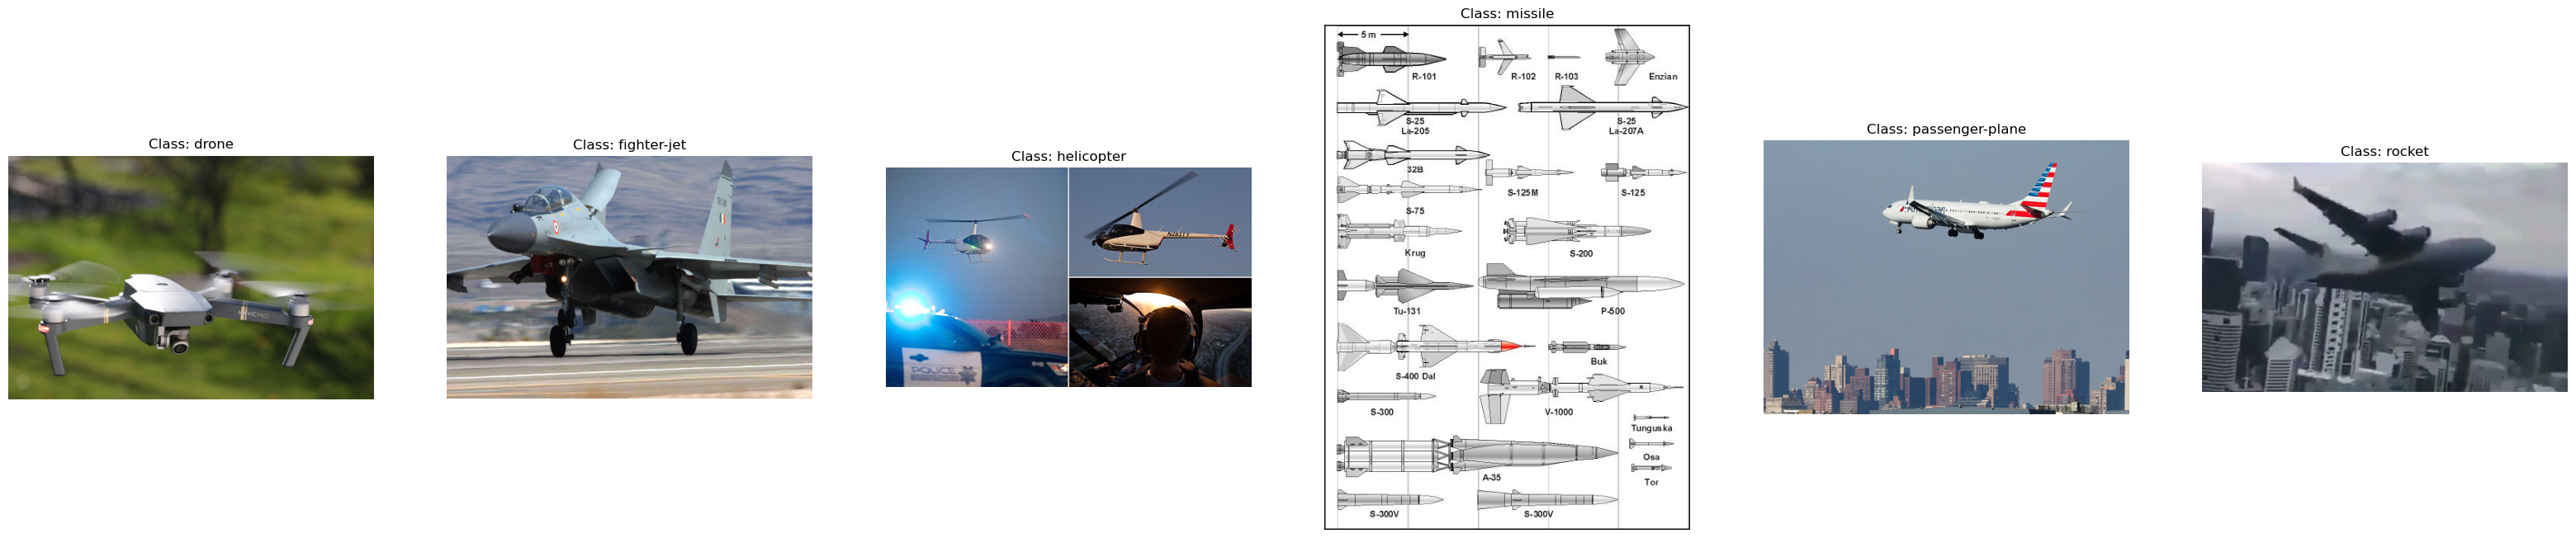

In [12]:
representative_images = train_df.groupby('targets').first().reset_index()
image_paths = representative_images['file_paths'].tolist()
image_targets = representative_images['target_names'].tolist()
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(1, len(image_paths), figsize=(40, 10))

for ax, img_path, target in zip(axes, image_paths, image_targets):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(f'Class: {target}')
    ax.axis('off')

plt.show()


# 3-1. 데이터프레임 Image 전처리 (applications = mobilent)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트



import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [16]:
model = MobileNetV2()
model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

# 3-1-1. model 의 분류기에서 Dense 개수 조절을 위한 create_model 사용

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_28530/2783626407.py:21: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,322,340 (8.86 MB)

 Trainable params: 2,288,228 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/project01-01/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [24]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 71s 360ms/step - acc: 0.2014 - loss: 2.1481 - val_acc: 0.2168 - val_loss: 1.8932 - learning_rate: 0.0010
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 61s 349ms/step - acc: 0.2932 - loss: 1.6611 - val_acc: 0.2227 - val_loss: 3.7815 - learning_rate: 0.0010
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 351ms/step - acc: 0.3825 - loss: 1.5541 - val_acc: 0.2457 - val_loss: 2.8377 - learning_rate: 0.0010
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 355ms/step - acc: 0.4430 - loss: 1.4359 - val_acc: 0.2814 - val_loss: 2.1540 - learning_rate: 0.0010
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 361ms/step - acc: 0.5000 - loss: 1.3649 - val_acc: 0.2190 - val_loss: 1.7843 - learning_rate: 0.0010
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 364ms/step - acc: 0.5277 - loss: 1.2830 - val_acc: 0.2628 - val_loss: 2.2061 - learning_rate: 0.0010
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 362ms/step - acc: 0.5660 - loss: 1.2136 - val_acc: 0.2591 - val_loss: 2.4045 - learning_rate: 0.0

In [25]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 356ms/step - acc: 0.6636 - loss: 0.9814 - val_acc: 0.2762 - val_loss: 3.7738 - learning_rate: 1.0000e-04
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 61s 353ms/step - acc: 0.6941 - loss: 0.8902 - val_acc: 0.3267 - val_loss: 3.1414 - learning_rate: 1.0000e-04
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 355ms/step - acc: 0.7220 - loss: 0.8016 - val_acc: 0.3563 - val_loss: 3.0884 - learning_rate: 1.0000e-04
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 359ms/step - acc: 0.7493 - loss: 0.7220 - val_acc: 0.3994 - val_loss: 2.5723 - learning_rate: 1.0000e-04


In [26]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 352ms/step - acc: 0.7569 - loss: 0.6741 - val_acc: 0.4595 - val_loss: 2.1477 - learning_rate: 1.0000e-04
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 61s 354ms/step - acc: 0.7730 - loss: 0.6579 - val_acc: 0.4781 - val_loss: 1.8423 - learning_rate: 1.0000e-04
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 354ms/step - acc: 0.7989 - loss: 0.5867 - val_acc: 0.4113 - val_loss: 2.3400 - learning_rate: 1.0000e-04
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 358ms/step - acc: 0.8127 - loss: 0.5115 - val_acc: 0.4284 - val_loss: 2.1341 - learning_rate: 1.0000e-04


In [151]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/project01-01/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='auto'
)

In [28]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 360ms/step - acc: 0.8280 - loss: 0.4786 - val_acc: 0.4707 - val_loss: 2.0397 - learning_rate: 1.0000e-04
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 353ms/step - acc: 0.8374 - loss: 0.4578 - val_acc: 0.4432 - val_loss: 2.2697 - learning_rate: 1.0000e-04
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 354ms/step - acc: 0.8399 - loss: 0.4806 - val_acc: 0.4588 - val_loss: 2.0453 - learning_rate: 1.0000e-04
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 358ms/step - acc: 0.8518 - loss: 0.4328 - val_acc: 0.4796 - val_loss: 1.8550 - learning_rate: 1.0000e-04
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 357ms/step - acc: 0.8604 - loss: 0.4173 - val_acc: 0.4655 - val_loss: 1.9710 - learning_rate: 1.0000e-04
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 64s 371ms/step - acc: 0.8600 - loss: 0.3898 - val_acc: 0.4566 - val_loss: 2.0700 - learning_rate: 1.0000e-04
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 357ms/step - acc: 0.8776 - loss: 0.3452 - val_acc: 0.4521 - va

## 3-1-2. xception model 변경

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트


import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_4[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_12[0][0]    

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [35]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 117s 675ms/step - acc: 0.8709 - loss: 0.3505 - val_acc: 0.4759 - val_loss: 1.8375 - learning_rate: 1.0000e-05
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 124s 721ms/step - acc: 0.8756 - loss: 0.3313 - val_acc: 0.4714 - val_loss: 1.8878 - learning_rate: 1.0000e-05
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 739ms/step - acc: 0.8884 - loss: 0.2959 - val_acc: 0.4781 - val_loss: 1.9245 - learning_rate: 1.0000e-05
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 748ms/step - acc: 0.8881 - loss: 0.3072 - val_acc: 0.4803 - val_loss: 1.9562 - learning_rate: 1.0000e-05
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 753ms/step - acc: 0.8887 - loss: 0.2856 - val_acc: 0.4811 - val_loss: 1.9708 - learning_rate: 1.0000e-06
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 759ms/step - acc: 0.8989 - loss: 0.2790 - val_acc: 0.4796 - val_loss: 1.9684 - learning_rate: 1.0000e-06
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 760ms/step - acc: 0.8981 - loss: 0.2775 - val_acc: 0.47

## 3-1-3. VGG 모델 변경

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  


import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=vgg16_preprocess_input)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,740,644 (56.23 MB)

 Trainable params: 14,740,644 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
N_EPOCHS = 30

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - acc: 0.2098 - loss: 2.5819 - val_acc: 0.2108 - val_loss: 1.8243 - learning_rate: 1.0000e-04
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - acc: 0.3407 - loss: 1.6092 - val_acc: 0.1685 - val_loss: 1.8185 - learning_rate: 1.0000e-04
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - acc: 0.4713 - loss: 1.3778 - val_acc: 0.1670 - val_loss: 1.8186 - learning_rate: 1.0000e-04
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - acc: 0.5671 - loss: 1.1749 - val_acc: 0.1722 - val_loss: 1.8255 - learning_rate: 1.0000e-04
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - acc: 0.6292 - loss: 1.0049 - val_acc: 0.1678 - val_loss: 1.8178 - learning_rate: 1.0000e-04
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - acc: 0.6814 - loss: 0.8772 - val_acc: 0.1678 - val_loss: 1.8172 - learning_rate: 1.0000e-04
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - acc: 0.7272 - loss: 0.7492 - val_acc: 0.1670 - val_loss: 1.8113 - learning

## 해당 모델에 대해서 과적합이 발생된 것으로 보이기 때문에 해소를 위한 드롭아웃 및 l2 규제 사용

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  

import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=vgg16_preprocess_input)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 32

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dropout(rate=0.2)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-3))(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [50]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,740,644 (56.23 MB)

 Trainable params: 14,740,644 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
import gc 

gc.collect()

58644

In [52]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - acc: 0.2102 - loss: 2.5882 - val_acc: 0.1440 - val_loss: 1.9029 - learning_rate: 1.0000e-04
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - acc: 0.3014 - loss: 1.7368 - val_acc: 0.1396 - val_loss: 1.8957 - learning_rate: 1.0000e-04
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - acc: 0.3801 - loss: 1.6082 - val_acc: 0.1418 - val_loss: 1.8810 - learning_rate: 1.0000e-04
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - acc: 0.4638 - loss: 1.4795 - val_acc: 0.1730 - val_loss: 1.8830 - learning_rate: 1.0000e-04
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - acc: 0.5917 - loss: 1.1980 - val_acc: 0.1693 - val_loss: 1.8825 - learning_rate: 1.0000e-04
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - acc: 0.6491 - loss: 1.0466 - val_acc: 0.2079 - val_loss: 1.8751 - learning_rate: 1.0000e-04
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - acc: 0.6937 - loss: 0.8991 - val_acc: 0.2257 - val_loss: 1.8699 - learning

## 3-1-5. 이미지 증강을 통한 모델 일반화 작업

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  

import albumentations as A

IMAGE_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input,
                                    horizontal_flip=True,  # 수평 뒤집기 활성화
                                    vertical_flip=True,  # 수직 뒤집기 활성화
                                    rotation_range=30,  # 0도에서 30도 사이에서 무작위로 회전
                                    width_shift_range=0.2,  # 전체 너비의 20% 범위에서 수평 이동
                                    height_shift_range=0.2,  # 전체 높이의 20% 범위에서 수직 이동
                                    fill_mode='nearest'  # 이동이나 회전으로 인해 생긴 공간을 가장 가까운 픽셀값으로 채움)
                                    )

validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [93]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 8

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [94]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_23[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_48[0][0]    

 Total params: 23,487,534 (89.60 MB)

 Trainable params: 23,433,006 (89.39 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [95]:
import gc 

gc.collect()

14

In [96]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=8,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 126s 687ms/step - acc: 0.2093 - loss: 1.9943 - val_acc: 0.2264 - val_loss: 2.0301 - learning_rate: 0.0010
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 126s 733ms/step - acc: 0.2277 - loss: 1.9300 - val_acc: 0.2123 - val_loss: 1.9022 - learning_rate: 0.0010
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 762ms/step - acc: 0.2240 - loss: 1.8977 - val_acc: 0.2249 - val_loss: 1.8653 - learning_rate: 0.0010
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 753ms/step - acc: 0.2273 - loss: 1.8563 - val_acc: 0.2494 - val_loss: 1.8166 - learning_rate: 0.0010
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 772ms/step - acc: 0.2369 - loss: 1.8262 - val_acc: 0.2442 - val_loss: 2.9440 - learning_rate: 0.0010
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 775ms/step - acc: 0.2440 - loss: 1.7930 - val_acc: 0.2673 - val_loss: 1.7572 - learning_rate: 0.0010
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 770ms/step - acc: 0.2591 - loss: 1.7625 - val_acc: 0.2680 - val_loss: 1.7382 - learning_ra

## 3-1-6. dropout 비율을 조정하여점수를 조금 더 높이려고 진행
- 규제 제거
- dropout 0.5 -> 0.3

In [99]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 8

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.3)(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [101]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/weights.003-1.5479-0.4681.weights.h5')
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_25[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_72 (Add)        │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_72[0][0]    

 Total params: 23,487,534 (89.60 MB)

 Trainable params: 23,433,006 (89.39 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [102]:
gc.collect()

28436

In [103]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=8,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 694ms/step - acc: 0.4615 - loss: 1.3923 - val_acc: 0.3764 - val_loss: 1.6655 - learning_rate: 0.0010
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 757ms/step - acc: 0.4553 - loss: 1.3941 - val_acc: 0.3816 - val_loss: 1.4617 - learning_rate: 0.0010
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 768ms/step - acc: 0.4640 - loss: 1.3704 - val_acc: 0.4039 - val_loss: 1.5222 - learning_rate: 0.0010
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 135s 782ms/step - acc: 0.4660 - loss: 1.3658 - val_acc: 0.3051 - val_loss: 1.7374 - learning_rate: 0.0010
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 813ms/step - acc: 0.4699 - loss: 1.3585 - val_acc: 0.3460 - val_loss: 1.7404 - learning_rate: 0.0010
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - acc: 0.5126 - loss: 1.2690 - val_acc: 0.4024 - val_loss: 1.5472 - learning_rate: 1.0000e-04
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - acc: 0.5257 - loss: 1.2667 - val_acc: 0.4046 - val_loss: 1.5156 - le

In [104]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=8,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 761ms/step - acc: 0.5384 - loss: 1.2108 - val_acc: 0.3875 - val_loss: 1.6453 - learning_rate: 1.0000e-04
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 143s 827ms/step - acc: 0.5308 - loss: 1.2344 - val_acc: 0.4061 - val_loss: 1.5577 - learning_rate: 1.0000e-04
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 773ms/step - acc: 0.5432 - loss: 1.1898 - val_acc: 0.4157 - val_loss: 1.5111 - learning_rate: 1.0000e-04
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 768ms/step - acc: 0.5322 - loss: 1.2065 - val_acc: 0.4001 - val_loss: 1.5764 - learning_rate: 1.0000e-04
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 134s 777ms/step - acc: 0.5446 - loss: 1.1956 - val_acc: 0.4016 - val_loss: 1.5529 - learning_rate: 1.0000e-04


In [105]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 753ms/step - acc: 0.5339 - loss: 1.1929 - val_acc: 0.4053 - val_loss: 1.5720 - learning_rate: 1.0000e-04
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 778ms/step - acc: 0.5596 - loss: 1.1446 - val_acc: 0.4009 - val_loss: 1.5688 - learning_rate: 1.0000e-04
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 770ms/step - acc: 0.5576 - loss: 1.1395 - val_acc: 0.4024 - val_loss: 1.5628 - learning_rate: 1.0000e-04
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 798ms/step - acc: 0.5723 - loss: 1.1313 - val_acc: 0.4105 - val_loss: 1.5012 - learning_rate: 1.0000e-04
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 136s 787ms/step - acc: 0.5637 - loss: 1.1324 - val_acc: 0.3950 - val_loss: 1.5746 - learning_rate: 1.0000e-04


In [106]:
gc.collect()

11282

In [107]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/weights.004-1.5012-0.5665.weights.h5')
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_26[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_84 (Add)        │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_84[0][0]    

 Total params: 23,487,534 (89.60 MB)

 Trainable params: 23,433,006 (89.39 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [108]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=32,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 751ms/step - acc: 0.5212 - loss: 1.2492 - val_acc: 0.3816 - val_loss: 1.5855 - learning_rate: 0.0010
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 135s 788ms/step - acc: 0.5079 - loss: 1.2660 - val_acc: 0.3994 - val_loss: 1.5049 - learning_rate: 0.0010
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 134s 780ms/step - acc: 0.5198 - loss: 1.2527 - val_acc: 0.3400 - val_loss: 1.6607 - learning_rate: 0.0010
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 135s 784ms/step - acc: 0.5250 - loss: 1.2311 - val_acc: 0.3207 - val_loss: 1.7727 - learning_rate: 0.0010
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 135s 787ms/step - acc: 0.5432 - loss: 1.2045 - val_acc: 0.4165 - val_loss: 1.4809 - learning_rate: 0.0010


## 3-1-7. dropout 개수를 제거 및 dense 층을 추가적으로 추가하여 모델이 validation 에 대해서 추가 분류를 할 수 있도록 진행
- valdation이 0.41 이 넘지 못하여 아래와 같은 수치 진행
- dropout 수치 0.3 -> 0.2
- dense 256 추가

In [109]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    
    x = Dense(256, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [110]:
gc.collect()

40153

In [112]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_28[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_108 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_108[0][0]   

 Total params: 23,617,326 (90.09 MB)

 Trainable params: 23,562,798 (89.88 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [113]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 762ms/step - acc: 0.2188 - loss: 1.8089 - val_acc: 0.2190 - val_loss: 1.7819 - learning_rate: 0.0010
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 766ms/step - acc: 0.2156 - loss: 1.7840 - val_acc: 0.2190 - val_loss: 1.7813 - learning_rate: 0.0010
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 762ms/step - acc: 0.2191 - loss: 1.7815 - val_acc: 0.2190 - val_loss: 1.7820 - learning_rate: 0.0010
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 761ms/step - acc: 0.2288 - loss: 1.7798 - val_acc: 0.2190 - val_loss: 1.7815 - learning_rate: 0.0010
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 138s 809ms/step - acc: 0.2165 - loss: 1.7841 - val_acc: 0.2190 - val_loss: 1.7814 - learning_rate: 0.0010


## 3-1-8. 학습률을 높여 수치가 발산하는 지 확인

In [114]:
gc.collect()

80100

In [117]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/weights.005-1.7814-0.2190.weights.h5')
model.compile(optimizer=Adam(0.01), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_30[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_132 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_132[0][0]   

 Total params: 23,617,326 (90.09 MB)

 Trainable params: 23,562,798 (89.88 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [118]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 747ms/step - acc: 0.2058 - loss: 1.7979 - val_acc: 0.1559 - val_loss: 1969327.6250 - learning_rate: 0.0100
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 805ms/step - acc: 0.2187 - loss: 1.7953 - val_acc: 0.2190 - val_loss: 1.7821 - learning_rate: 0.0100
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 142s 824ms/step - acc: 0.2125 - loss: 1.7933 - val_acc: 0.2190 - val_loss: 1.7822 - learning_rate: 0.0100
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 140s 817ms/step - acc: 0.2183 - loss: 1.7840 - val_acc: 0.1737 - val_loss: 30.3206 - learning_rate: 0.0100
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 148s 860ms/step - acc: 0.2193 - loss: 1.7985 - val_acc: 0.2190 - val_loss: 1.7816 - learning_rate: 0.0100


## 3-1-9. dense 의 개수를 줄이고 드롭아웃의 개수를 늘려서 추가 학습 진행
- 학습률 -> 1e-5 변경
- 일반화 작업중

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  

import albumentations as A

IMAGE_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input,
                                    horizontal_flip=True,  # 수평 뒤집기 활성화
                                    vertical_flip=True,  # 수직 뒤집기 활성화
                                    rotation_range=30,  # 0도에서 30도 사이에서 무작위로 회전
                                    # width_shift_range=0.2,  # 전체 너비의 20% 범위에서 수평 이동
                                    # height_shift_range=0.2,  # 전체 높이의 20% 범위에서 수직 이동
                                    fill_mode='nearest'  # 이동이나 회전으로 인해 생긴 공간을 가장 가까운 픽셀값으로 채움)
                                    )

validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [127]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.4)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.4)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [128]:
gc.collect()

71237

In [129]:
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-5), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_33[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_168 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_168[0][0]   

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [131]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 135s 786ms/step - acc: 0.2073 - loss: 1.7676 - val_acc: 0.2428 - val_loss: 2.0597 - learning_rate: 1.0000e-06
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 800ms/step - acc: 0.2050 - loss: 1.7678 - val_acc: 0.2494 - val_loss: 2.0456 - learning_rate: 1.0000e-06
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 148s 866ms/step - acc: 0.2068 - loss: 1.7679 - val_acc: 0.2368 - val_loss: 2.1681 - learning_rate: 1.0000e-06
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 151s 884ms/step - acc: 0.2062 - loss: 1.7650 - val_acc: 0.2420 - val_loss: 2.1099 - learning_rate: 1.0000e-06
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 154s 896ms/step - acc: 0.2123 - loss: 1.7655 - val_acc: 0.2480 - val_loss: 2.1571 - learning_rate: 1.0000e-06


## 3-1-10. 데이터 증강을 사용한 이후 수치가 너무 낮게 나오기 때문에 데이터 증강 부분을 제외하고 드롭아웃은 동일한 수치값으로 훈련 진행

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  

import albumentations as A

IMAGE_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [133]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.4)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.4)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [134]:
gc.collect()

41593

In [135]:
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(1e-4), loss= CategoricalCrossentropy(), metrics = ['acc'])

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_34[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_60[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_180 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_180[0][0]   

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [136]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 155s 860ms/step - acc: 0.1847 - loss: 1.8177 - val_acc: 0.2821 - val_loss: 1.7517 - learning_rate: 1.0000e-04
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 847ms/step - acc: 0.3487 - loss: 1.6162 - val_acc: 0.4425 - val_loss: 1.4621 - learning_rate: 1.0000e-04
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 149s 873ms/step - acc: 0.5113 - loss: 1.2604 - val_acc: 0.4684 - val_loss: 1.3649 - learning_rate: 1.0000e-04
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 149s 865ms/step - acc: 0.6537 - loss: 0.9568 - val_acc: 0.4098 - val_loss: 1.5980 - learning_rate: 1.0000e-04
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 147s 859ms/step - acc: 0.7342 - loss: 0.7509 - val_acc: 0.4818 - val_loss: 1.5440 - learning_rate: 1.0000e-04
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 848ms/step - acc: 0.7893 - loss: 0.5926 - val_acc: 0.4432 - val_loss: 1.6917 - learning_rate: 1.0000e-04
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 149s 868ms/step - acc: 0.8403 - loss: 0.4554 - val_acc: 0.4625 - val_lo

In [137]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 802ms/step - acc: 0.8678 - loss: 0.3819 - val_acc: 0.4529 - val_loss: 1.7684 - learning_rate: 1.0000e-05
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 146s 849ms/step - acc: 0.8786 - loss: 0.3480 - val_acc: 0.4543 - val_loss: 1.7708 - learning_rate: 1.0000e-05
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 147s 861ms/step - acc: 0.8830 - loss: 0.3334 - val_acc: 0.4595 - val_loss: 1.7771 - learning_rate: 1.0000e-05
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 146s 851ms/step - acc: 0.8831 - loss: 0.3162 - val_acc: 0.4529 - val_loss: 1.8168 - learning_rate: 1.0000e-05
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 149s 867ms/step - acc: 0.8865 - loss: 0.3016 - val_acc: 0.4573 - val_loss: 1.7957 - learning_rate: 1.0000e-06


In [138]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 143s 827ms/step - acc: 0.8904 - loss: 0.2960 - val_acc: 0.4551 - val_loss: 1.8377 - learning_rate: 1.0000e-06
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 889ms/step - acc: 0.8926 - loss: 0.2992 - val_acc: 0.4529 - val_loss: 1.8376 - learning_rate: 1.0000e-06
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 142s 826ms/step - acc: 0.8982 - loss: 0.2864 - val_acc: 0.4573 - val_loss: 1.8137 - learning_rate: 1.0000e-06
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 770ms/step - acc: 0.8860 - loss: 0.2965 - val_acc: 0.4558 - val_loss: 1.8404 - learning_rate: 1.0000e-06
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 748ms/step - acc: 0.9005 - loss: 0.2791 - val_acc: 0.4529 - val_loss: 1.8308 - learning_rate: 1.0000e-06


In [139]:
gc.collect()

41226

In [140]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 126s 734ms/step - acc: 0.8845 - loss: 0.3066 - val_acc: 0.4566 - val_loss: 1.8280 - learning_rate: 1.0000e-06
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 748ms/step - acc: 0.8843 - loss: 0.2988 - val_acc: 0.4558 - val_loss: 1.8140 - learning_rate: 1.0000e-06
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 760ms/step - acc: 0.9033 - loss: 0.2873 - val_acc: 0.4633 - val_loss: 1.8266 - learning_rate: 1.0000e-06
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 747ms/step - acc: 0.9074 - loss: 0.2682 - val_acc: 0.4573 - val_loss: 1.8484 - learning_rate: 1.0000e-06
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 755ms/step - acc: 0.8916 - loss: 0.2970 - val_acc: 0.4558 - val_loss: 1.8575 - learning_rate: 1.0000e-06


## 3-1-11. 규제 1개 추가해서 일반화 후 기존 가중치에 모델 추가

In [141]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.4)(x)
    
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(rate=0.4)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [142]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/p1_weights.003-1.8266-0.9012.weights.h5')
model.compile(optimizer=Adam(1e-6), loss= CategoricalCrossentropy(), metrics = ['acc'])
gc.collect()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_35[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_64[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_192 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_192[0][0]   

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

15390

In [144]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 695ms/step - acc: 0.8950 - loss: 0.2882 - val_acc: 0.4595 - val_loss: 1.8452 - learning_rate: 1.0000e-07
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 746ms/step - acc: 0.8963 - loss: 0.3009 - val_acc: 0.4595 - val_loss: 1.8504 - learning_rate: 1.0000e-07
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 134s 781ms/step - acc: 0.9021 - loss: 0.2745 - val_acc: 0.4551 - val_loss: 1.8426 - learning_rate: 1.0000e-07
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 766ms/step - acc: 0.8859 - loss: 0.3004 - val_acc: 0.4536 - val_loss: 1.8673 - learning_rate: 1.0000e-07
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 772ms/step - acc: 0.8908 - loss: 0.2898 - val_acc: 0.4566 - val_loss: 1.8883 - learning_rate: 1.0000e-07


## 3-1-12. 규제의 수치를 높여 일반화 진행

In [148]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.4)(x)
    
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = Dropout(rate=0.4)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [149]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/p1_weights.003-1.8266-0.9012.weights.h5')
model.compile(optimizer=Adam(1e-6), loss= CategoricalCrossentropy(), metrics = ['acc'])
gc.collect()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_37[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_72[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_216 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_216[0][0]   

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

41228

In [150]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 725ms/step - acc: 0.8975 - loss: 0.3834 - val_acc: 0.4536 - val_loss: 1.9274 - learning_rate: 1.0000e-06
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 739ms/step - acc: 0.9001 - loss: 0.3856 - val_acc: 0.4543 - val_loss: 1.9478 - learning_rate: 1.0000e-06
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 738ms/step - acc: 0.8959 - loss: 0.3733 - val_acc: 0.4536 - val_loss: 1.9425 - learning_rate: 1.0000e-06
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 136s 790ms/step - acc: 0.8944 - loss: 0.3731 - val_acc: 0.4506 - val_loss: 1.9598 - learning_rate: 1.0000e-06
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 138s 797ms/step - acc: 0.8945 - loss: 0.3770 - val_acc: 0.4529 - val_loss: 1.9710 - learning_rate: 1.0000e-07


## 3-1-13. 데이터 증강을 통한 일반화 (변수 2개)

In [152]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  

import albumentations as A

IMAGE_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input,
                                    horizontal_flip=True,  # 수평 뒤집기 활성화
                                    vertical_flip=True  # 수직 뒤집기 활성화
                                    # rotation_range=30,  # 0도에서 30도 사이에서 무작위로 회전
                                    # width_shift_range=0.2,  # 전체 너비의 20% 범위에서 수평 이동
                                    # height_shift_range=0.2,  # 전체 높이의 20% 범위에서 수직 이동
                                    # fill_mode='nearest'  # 이동이나 회전으로 인해 생긴 공간을 가장 가까운 픽셀값으로 채움)
                                    )

validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [153]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.4)(x)
    
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = Dropout(rate=0.4)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [154]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/p1_weights.003-1.8266-0.9012.weights.h5')
model.compile(optimizer=Adam(1e-6), loss= CategoricalCrossentropy(), metrics = ['acc'])
gc.collect()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_38      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_38[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_76[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_228 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_228[0][0]   

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

39038

In [155]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 700ms/step - acc: 0.5935 - loss: 1.5274 - val_acc: 0.4477 - val_loss: 2.0813 - learning_rate: 1.0000e-06
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 738ms/step - acc: 0.6020 - loss: 1.4861 - val_acc: 0.4447 - val_loss: 2.1242 - learning_rate: 1.0000e-06
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 754ms/step - acc: 0.6012 - loss: 1.4834 - val_acc: 0.4484 - val_loss: 2.0771 - learning_rate: 1.0000e-06
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 756ms/step - acc: 0.6037 - loss: 1.4325 - val_acc: 0.4506 - val_loss: 2.0337 - learning_rate: 1.0000e-06
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 767ms/step - acc: 0.6068 - loss: 1.4586 - val_acc: 0.4499 - val_loss: 2.0256 - learning_rate: 1.0000e-06
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 774ms/step - acc: 0.5902 - loss: 1.4597 - val_acc: 0.4477 - val_loss: 2.0635 - learning_rate: 1.0000e-06
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 768ms/step - acc: 0.5974 - loss: 1.4083 - val_acc: 0.4551 - val_lo

KeyboardInterrupt: 

## 3-1-12. 수치가 안나오기 때문에 규제를 해제 후 추가 훈련 진행

In [159]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.4)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.4)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model


In [160]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/p1_weights.003-1.8266-0.9012.weights.h5')
model.compile(optimizer=Adam(1e-6), loss= CategoricalCrossentropy(), metrics = ['acc'])
gc.collect()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_39[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_80[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_240 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_240[0][0]   

 Total params: 20,964,236 (79.97 MB)

 Trainable params: 20,909,708 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

41819

In [161]:
N_EPOCHS = 40

history = model.fit(train_flow,
                    batch_size=16,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 766ms/step - acc: 0.5960 - loss: 1.4138 - val_acc: 0.4491 - val_loss: 1.9343 - learning_rate: 1.0000e-06
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 745ms/step - acc: 0.5990 - loss: 1.4368 - val_acc: 0.4432 - val_loss: 1.9725 - learning_rate: 1.0000e-06
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 750ms/step - acc: 0.6031 - loss: 1.4102 - val_acc: 0.4469 - val_loss: 1.9837 - learning_rate: 1.0000e-06
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 757ms/step - acc: 0.6112 - loss: 1.3668 - val_acc: 0.4469 - val_loss: 1.9661 - learning_rate: 1.0000e-06
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 750ms/step - acc: 0.6032 - loss: 1.4096 - val_acc: 0.4447 - val_loss: 1.9981 - learning_rate: 1.0000e-07
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 126s 737ms/step - acc: 0.6044 - loss: 1.3312 - val_acc: 0.4506 - val_loss: 1.9455 - learning_rate: 1.0000e-07
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 738ms/step - acc: 0.5973 - loss: 1.3760 - val_acc: 0.44

KeyboardInterrupt: 

## 3-1-16. 마지막 flatten 을 주기 위한 훈련 진행.

In [168]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2

IMAGE_SIZE = 64

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Dense(50, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    
    output = Dense(6, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input  # 수정된 임포트
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input  

import albumentations as A

IMAGE_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input,
                                    horizontal_flip=True,  # 수평 뒤집기 활성화
                                    vertical_flip=True  # 수직 뒤집기 활성화
                                    # rotation_range=30,  # 0도에서 30도 사이에서 무작위로 회전
                                    # width_shift_range=0.2,  # 전체 너비의 20% 범위에서 수평 이동
                                    # height_shift_range=0.2,  # 전체 높이의 20% 범위에서 수직 이동
                                    # fill_mode='nearest'  # 이동이나 회전으로 인해 생긴 공간을 가장 가까운 픽셀값으로 채움)
                                    )

validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

test_flow = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col = 'file_paths', 
                                                 y_col = 'target_names',
                                                 target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 )

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)


Found 5384 validated image filenames belonging to 6 classes.
Found 1347 validated image filenames belonging to 6 classes.
Found 1683 validated image filenames belonging to 6 classes.
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
{'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}


In [169]:
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])
gc.collect()

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_42      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_42[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_92 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_92[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_276 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_276[0][0]   

 Total params: 21,271,436 (81.14 MB)

 Trainable params: 21,216,908 (80.94 MB)

 Non-trainable params: 54,528 (213.00 KB)

39379

In [170]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=8,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 130s 710ms/step - acc: 0.1960 - loss: 1.8139 - val_acc: 0.2339 - val_loss: 1.7685 - learning_rate: 0.0010
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 749ms/step - acc: 0.2297 - loss: 1.7759 - val_acc: 0.2398 - val_loss: 1.7399 - learning_rate: 0.0010
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 775ms/step - acc: 0.2310 - loss: 1.7606 - val_acc: 0.2249 - val_loss: 7.4254 - learning_rate: 0.0010
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 812ms/step - acc: 0.2312 - loss: 1.7714 - val_acc: 0.2331 - val_loss: 1.8784 - learning_rate: 0.0010
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 774ms/step - acc: 0.2481 - loss: 1.7585 - val_acc: 0.2598 - val_loss: 1.8939 - learning_rate: 0.0010
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 775ms/step - acc: 0.3013 - loss: 1.6887 - val_acc: 0.2680 - val_loss: 1.7207 - learning_rate: 1.0000e-04
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 778ms/step - acc: 0.2926 - loss: 1.6692 - val_acc: 0.2702 - val_loss: 1.7017 - learnin

In [171]:
model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/project01-01/p2_weights.010-1.5506-0.3574.weights.h5')
model.compile(optimizer=Adam(), loss= CategoricalCrossentropy(), metrics = ['acc'])
gc.collect()

Model: "functional_61"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_43      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 31, 31,    │        864 │ input_layer_43[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 31, 31,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 31, 31,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 29, 29,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 29, 29,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 29, 29,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 29, 29,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 29, 29,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 29, 29,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 29, 29,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 29, 29,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 15, 15,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 15, 15,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        512 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_288 (Add)       │ (None, 15, 15,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 15, 15,    │          0 │ add_288[0][0]   

 Total params: 21,271,436 (81.14 MB)

 Trainable params: 21,216,908 (80.94 MB)

 Non-trainable params: 54,528 (213.00 KB)

47211

In [172]:
N_EPOCHS = 20

history = model.fit(train_flow,
                    batch_size=8,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 696ms/step - acc: 0.3304 - loss: 1.6277 - val_acc: 0.3222 - val_loss: 3.4367 - learning_rate: 0.0010
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 128s 746ms/step - acc: 0.3428 - loss: 1.5832 - val_acc: 0.2925 - val_loss: 1.7523 - learning_rate: 0.0010
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 766ms/step - acc: 0.3988 - loss: 1.5389 - val_acc: 0.3994 - val_loss: 1.5077 - learning_rate: 0.0010
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 134s 782ms/step - acc: 0.4313 - loss: 1.4636 - val_acc: 0.3549 - val_loss: 1.5766 - learning_rate: 0.0010
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 135s 789ms/step - acc: 0.4420 - loss: 1.4452 - val_acc: 0.3756 - val_loss: 1.6042 - learning_rate: 0.0010
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 811ms/step - acc: 0.4621 - loss: 1.3741 - val_acc: 0.3422 - val_loss: 1.7218 - learning_rate: 0.0010
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 896ms/step - acc: 0.4792 - loss: 1.3382 - val_acc: 0.3831 - val_loss: 1.5931 - 